In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import seaborn as sns

Constants for seqence generation:

In [2]:
p = .3
trial_length = 60
streak_length = 3
n_trials = 10000

Generate random dataset

In [3]:
def generate_trial(p: float, trial_length: int) -> list[int]:
    result = np.empty(trial_length, int)

    for i in range(trial_length):
        r = random()
        if r > p:
            result[i] = 0
        else:
            result[i] = 1

    return result

Generating samples and finding probabilities:

In [4]:
probabilities = np.empty(n_trials, float)
i = 0
redone = 0
while i < n_trials:
    data = generate_trial(p, trial_length)

    hits = 0
    streaks = 0
    for j in range(trial_length):
        if j < (trial_length - streak_length) and sum(data[j:j+streak_length]) == streak_length:
            streaks += 1
            if data[j + streak_length] == 1:
                hits += 1
    
    if streaks > 0:
        probabilities[i] = float(hits) / streaks
        i += 1
    else:
        redone += 1

print(len(probabilities))
print(redone)

10000
4499


Histogram:

<function matplotlib.pyplot.show(close=None, block=None)>

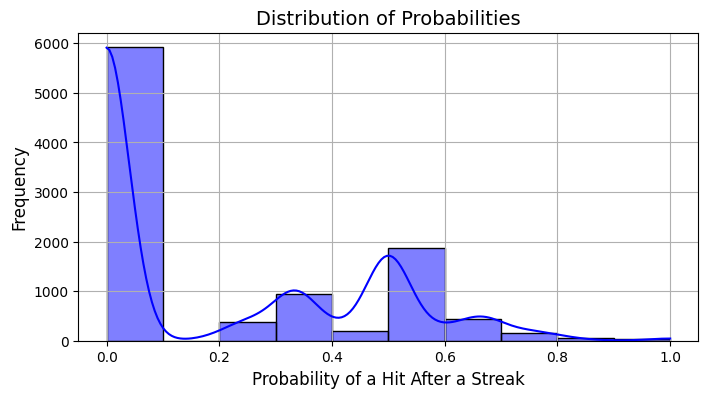

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(probabilities, bins=10, kde=True, color="blue")

plt.xlabel("Probability of a Hit After a Streak", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Probabilities", fontsize=14)
plt.grid(True)

plt.show